In [ ]:
from __future__ import division
import numpy as np
import pandas as pd
import xgboost
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import learning_curve
from time import time
from sklearn.metrics import r2_score


In [ ]:
data = pd.read_csv('/content/kc_house_data.csv')
df_train=data.copy()
df_train.rename(columns={'price':'SalePrice'}, inplace=True)
data

In [ ]:
print(len(data))

21613


In [ ]:
print(data.isnull().any().sum(),'/', len(data.columns))

0 / 21


In [ ]:
print(data.isnull().any(axis=1).sum(),'/', len(data))

0 / 21613


In [ ]:
features= data.iloc[:,3:].columns.tolist()
target= data.iloc[:,2].name

In [ ]:
correlations={}
for f in features:
  data_temp = data[[f,target]]
  x1 = data_temp[f].values
  x2 = data_temp[target].values
  key = f + 'vs'+ target
  correlations[key] = pearsonr(x1,x2)[0]


In [ ]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_livingvsprice,0.702035
gradevsprice,0.667434
sqft_abovevsprice,0.605567
sqft_living15vsprice,0.585379
bathroomsvsprice,0.525138
viewvsprice,0.397293
sqft_basementvsprice,0.323816
bedroomsvsprice,0.308350
latvsprice,0.307003
waterfrontvsprice,0.266369


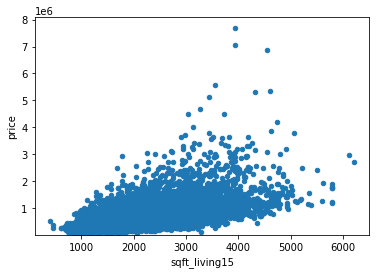

In [ ]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(5000))

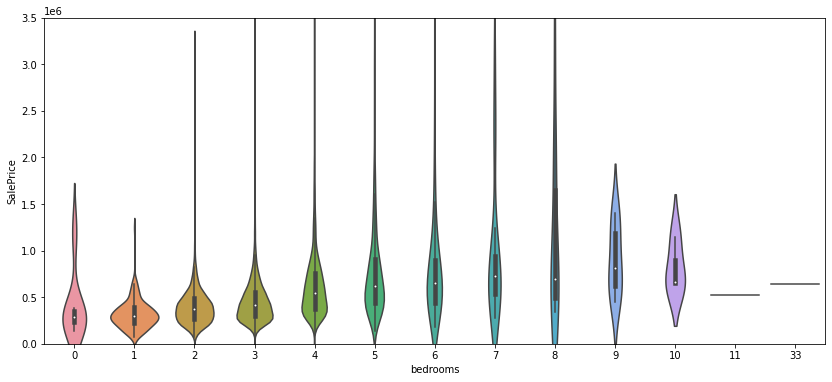

In [ ]:
var='bedrooms'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14, 6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);


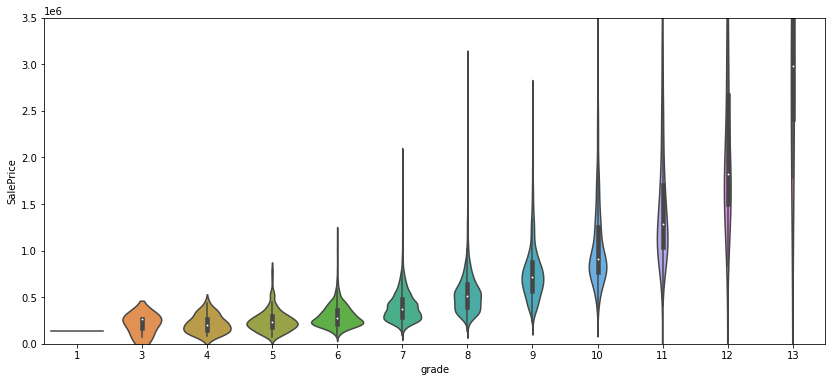

In [ ]:
var='grade'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14, 6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

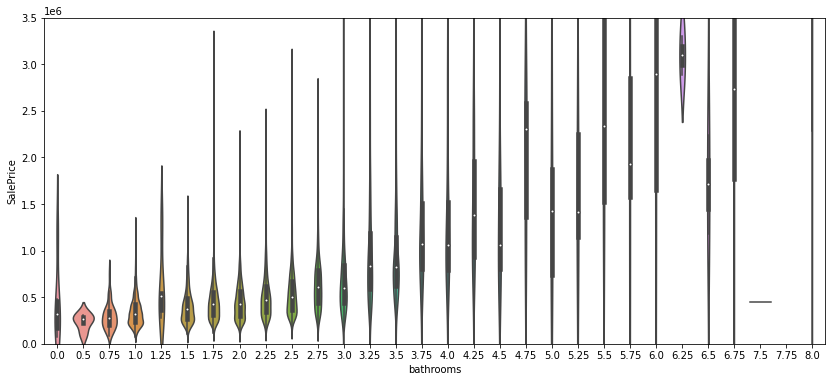

In [ ]:
var='bathrooms'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14, 6))
fig= sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

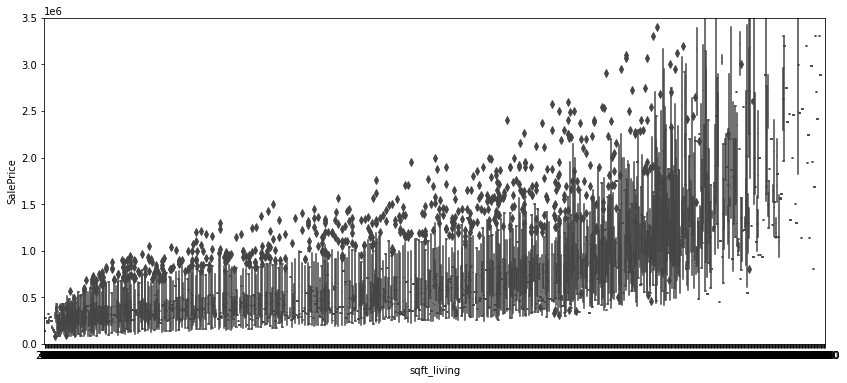

In [ ]:
var='sqft_living'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14, 6))
fig= sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

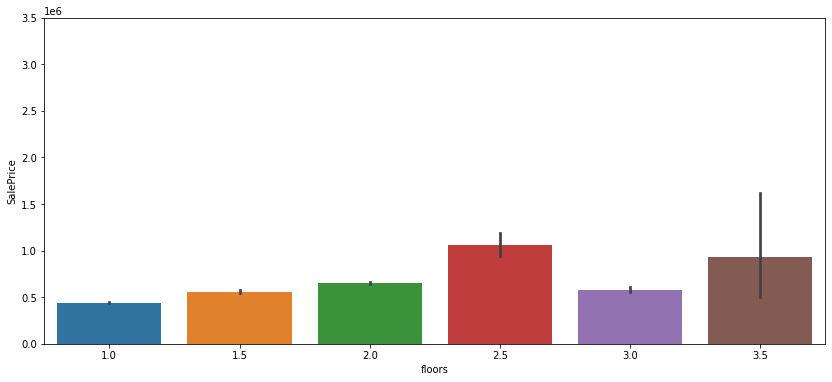

In [ ]:
var='floors'
data =pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(14, 6))
fig= sns.barplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

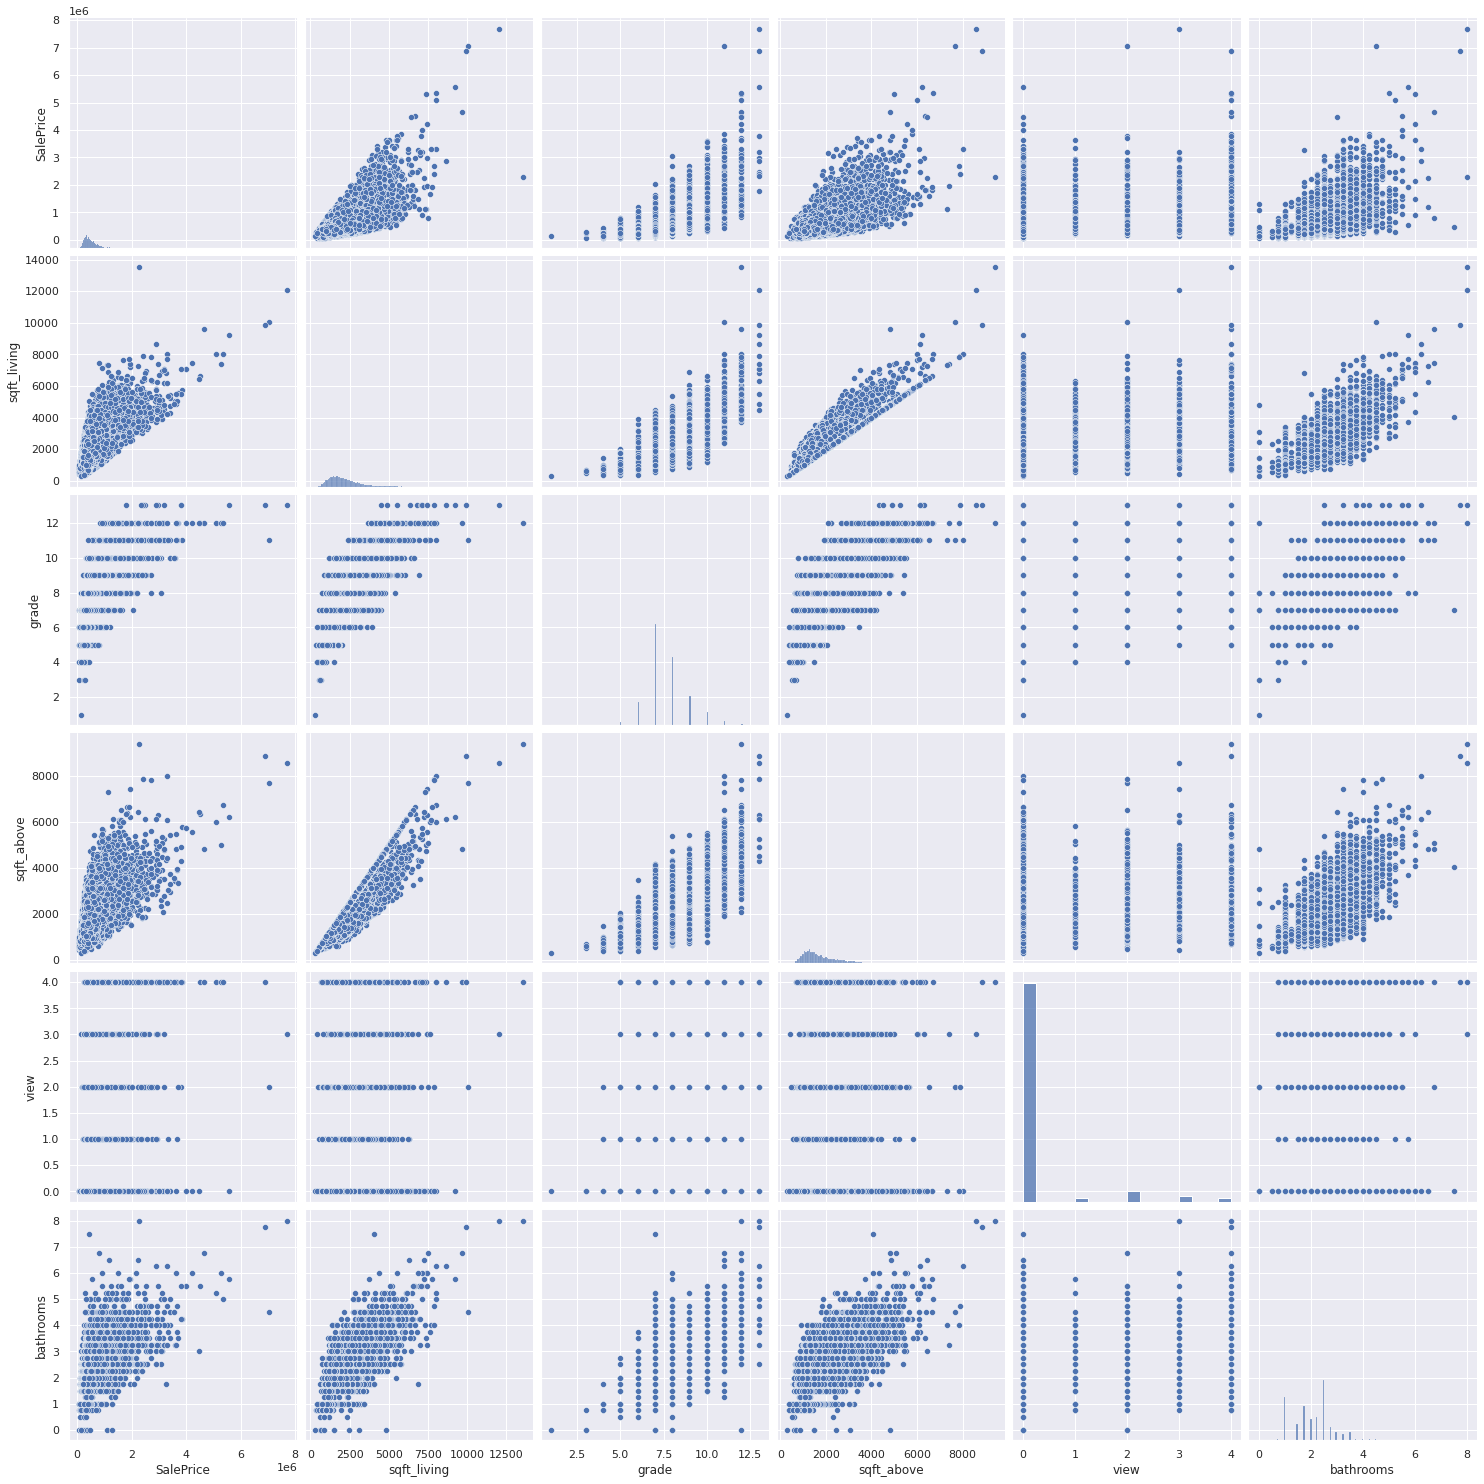

In [ ]:
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(df_train[cols], height=3.5)
plt.show();

In [ ]:
new_data= df_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
X = new_data.values
y=df_train.SalePrice.values

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=500, random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end = time()
train_time_rand=end-start
random=rand_regr.score(X_test, y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions, y_test)
exp1 = r2_score(predictions, y_test)
print(train_time_rand, exp_rand, exp1)

23.551074743270874 0.4328766682139663 0.4323205346539225


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est = GradientBoostingRegressor(n_estimators=500, max_depth=5, loss='squared_error', min_samples_split=1000)
end = time()
train_time_g=end-start
est.fit(X_train, y_train)
gradient=est.score(X_test, y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred, y_test)
exp2 = r2_score(predictions, y_test)
print(train_time_g, gradient, exp_est, exp2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


0.0002734661102294922 0.631749447308997 0.42716635878864495 0.4323205346539225


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
est = AdaBoostRegressor(n_estimators=50, learning_rate=0.5, loss='exponential').fit(X_train, y_train)
end = time()
train_time_g1=end-start
gradient1=est.score(X_test, y_test)
pred = est.predict(X_test)
exp_est1 = explained_variance_score(pred, y_test)
exp3=r2_score(pred, y_test)
print(train_time_g1, gradient1, exp_est1, exp3)

0.7991337776184082 0.4774600495709417 0.46345381599240376 0.3653566518189989


In [ ]:
from xgboost import XGBRegressor
start = time()
model = XGBRegressor(n_estimators=1000, learning_rate=0.25, loss='exponential').fit(X_train, y_train)
end = time()
train_time = end-start
grad= model.score(X_test, y_test)
pre= model.predict(X_test)
exp_model = explained_variance_score(pre, y_test)
exp4=r2_score(pre, y_test)
print(train_time, grad, exp_model, exp4)


[05:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.185786724090576 0.6030007970097804 0.45132515294910325 0.45079685417255244


In [ ]:
from sklearn.tree import DecisionTreeRegressor
start=time()
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
end=time()
train_time_dt=end-start
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree = explained_variance_score(reg_tree_pred, y_test)
exp5 = r2_score(reg_tree_pred, y_test)
print(train_time_dt, exp_reg_tree, exp5)


6.29425048828125e-05 0.2510708646096954 0.250774334621376


In [ ]:
y_train

array([195000., 335000., 800000., ..., 375000., 475000., 649950.])

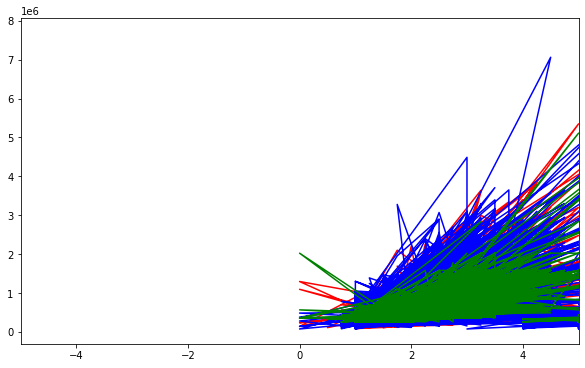

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, "r")
plt.plot(X_train, y_train, c="b")
plt.plot(X_test, reg_tree_pred, "g")
plt.xlim([-5, 5])
#plt.title( "Decision tree regressor, MSE = %.2f"   % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

In [ ]:
from lightgbm import LGBMRegressor
start=time()
reg_tree = LGBMRegressor(learning_rate=0.2, max_depth=8)
end=time()
train_time_dt = end-start
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree = explained_variance_score(reg_tree_pred, y_test)
exp = r2_score(reg_tree_pred, y_test)
print(train_time_dt, exp_reg_tree, exp)


0.00020456314086914062 0.3801585402302602 0.3800261450437493


In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
start=time()
reg_tree = CatBoostRegressor(learning_rate=0.02, max_depth=8).fit(X_train, y_train)
end=time()
train_time_dt1 = end-start
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree1 = explained_variance_score(reg_tree_pred, y_test)
exp7 = r2_score(reg_tree_pred, y_test)
print(train_time_dt1, exp_reg_tree1, exp7)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0:	learn: 362012.1751064	total: 6.43ms	remaining: 6.42s
1:	learn: 358302.9916507	total: 11.8ms	remaining: 5.86s
2:	learn: 354710.0873116	total: 16.2ms	remaining: 5.4s
3:	learn: 351210.6478827	total: 20.8ms	remaining: 5.17s
4:	learn: 347751.4799075	total: 25.6ms	remaining: 5.1s
5:	learn: 344454.5854640	total: 30ms	remaining: 4.97s
6:	learn: 341233.0742395	total: 34.5ms	remaining: 4.89s
7:	learn: 338101.8271538	total: 39.1ms	remaining: 4.85s
8:	learn: 335010.0179223	total: 43.8ms	remaining: 4.82s
9:	learn: 331903.4842359	total: 48.5ms	remaining: 4.8s
10:	learn: 329036.2158818	total: 52.9ms	remaining: 4.75s
11:	learn: 326168.9833482	total: 59.5ms	remaining: 4.9s
12:	learn: 323360.5411804	total: 64.4ms	remaining: 4.89s
13:	learn: 320663.4334109	total: 69.2ms	remaining: 4.87s
14:	learn: 317986.6398255	total: 73.9ms	remaining: 4.86s
15:	learn: 315397.1770887	total: 78.7ms	remaining: 4.84s
16:	l

In [ ]:
from catboost import CatBoostRegressor
start=time()
reg_tree = CatBoostRegressor(learning_rate=0.3, max_depth=5).fit(X_train, y_train)
end=time()
train_time_dt1 = end-start
reg_tree_pred = reg_tree.predict(X_test)
exp_reg_tree1 = explained_variance_score(reg_tree_pred, y_test)
exp7 = r2_score(reg_tree_pred, y_test)
print(train_time_dt1, exp_reg_tree1, exp7)

0:	learn: 313622.4309627	total: 2.3ms	remaining: 2.3s
1:	learn: 282634.2602077	total: 4.48ms	remaining: 2.24s
2:	learn: 264010.7018814	total: 6.52ms	remaining: 2.17s
3:	learn: 252612.7618976	total: 8.53ms	remaining: 2.12s
4:	learn: 245296.9946033	total: 10.6ms	remaining: 2.1s
5:	learn: 240078.6090413	total: 12.7ms	remaining: 2.1s
6:	learn: 236345.6673846	total: 14.7ms	remaining: 2.08s
7:	learn: 233576.6662815	total: 16.7ms	remaining: 2.07s
8:	learn: 231277.1824230	total: 18.6ms	remaining: 2.05s
9:	learn: 229603.0299786	total: 20.6ms	remaining: 2.04s
10:	learn: 229005.0630619	total: 22.6ms	remaining: 2.03s
11:	learn: 228281.1895872	total: 25.4ms	remaining: 2.09s
12:	learn: 226832.7242335	total: 27.5ms	remaining: 2.09s
13:	learn: 226664.5893915	total: 28.9ms	remaining: 2.03s
14:	learn: 225866.7752979	total: 30.6ms	remaining: 2.01s
15:	learn: 224560.6267985	total: 32.4ms	remaining: 1.99s
16:	learn: 223438.8559141	total: 34.2ms	remaining: 1.98s
17:	learn: 223103.0970046	total: 35.8ms	remai